In [6]:
data <- read.csv("../sdg7_renewable_energy_percent.csv")
head(data)
summary(data)

,Year,Renewable_Energy_Percent
,<int>,<dbl>
1,1990,12.75
2,1991,12.26
3,1992,13.91
4,1993,15.69
5,1994,13.52
6,1995,13.99


      Year      Renewable_Energy_Percent
 Min.   :1990   Min.   :12.26           
 1st Qu.:1998   1st Qu.:15.98           
 Median :2006   Median :18.19           
 Mean   :2006   Mean   :19.30           
 3rd Qu.:2014   3rd Qu.:22.46           
 Max.   :2022   Max.   :29.31           

In [7]:
data <- na.omit(data)
data <- unique(data)

data$Year <- as.integer(data$Year)
data$Renewable_Energy_Percent <- as.numeric(data$Renewable_Energy_Percent)


In [8]:
library(ggplot2)

ggplot(data, aes(x = Year, y = Renewable_Energy_Percent)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(title = "Renewable Energy (% of Total)", y = "Percent", x = "Year") +
  theme_minimal()

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


Installing package into 'C:/Users/ricop/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'farver', 'labeling', 'R6', 'RColorBrewer', 'viridisLite', 'magrittr', 'pkgconfig', 'gtable', 'isoband', 'scales', 'tibble', 'withr'




package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ricop\AppData\Local\Temp\RtmpkBkjAE\downloaded_packages


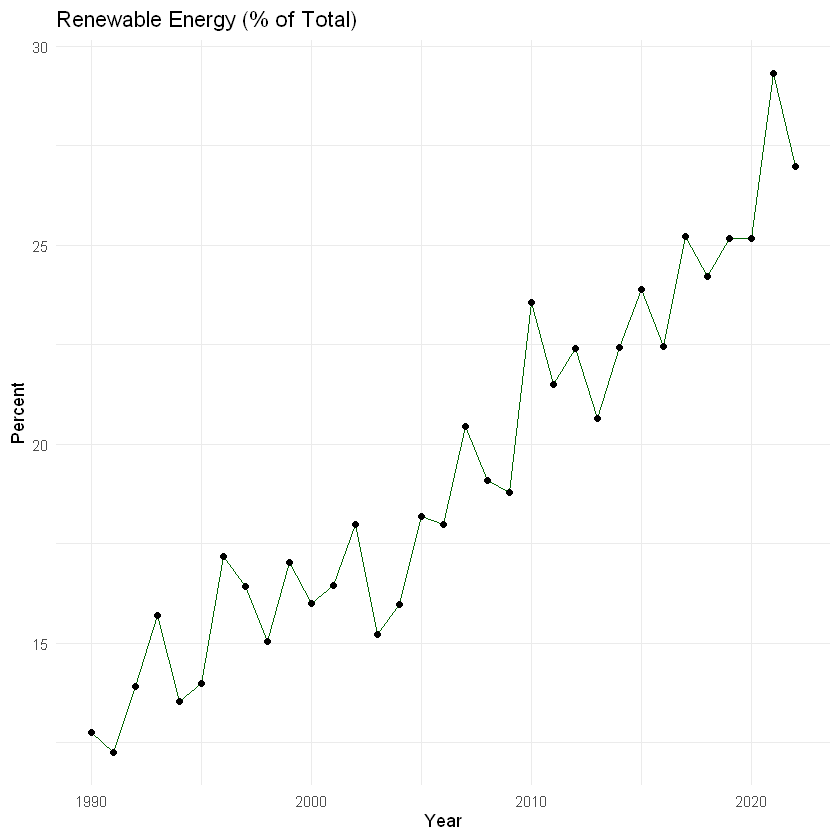

In [9]:
install.packages("ggplot2")
library(ggplot2)


ggplot(data, aes(x = Year, y = Renewable_Energy_Percent)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(title = "Renewable Energy (% of Total)", y = "Percent", x = "Year") +
  theme_minimal()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


NULL

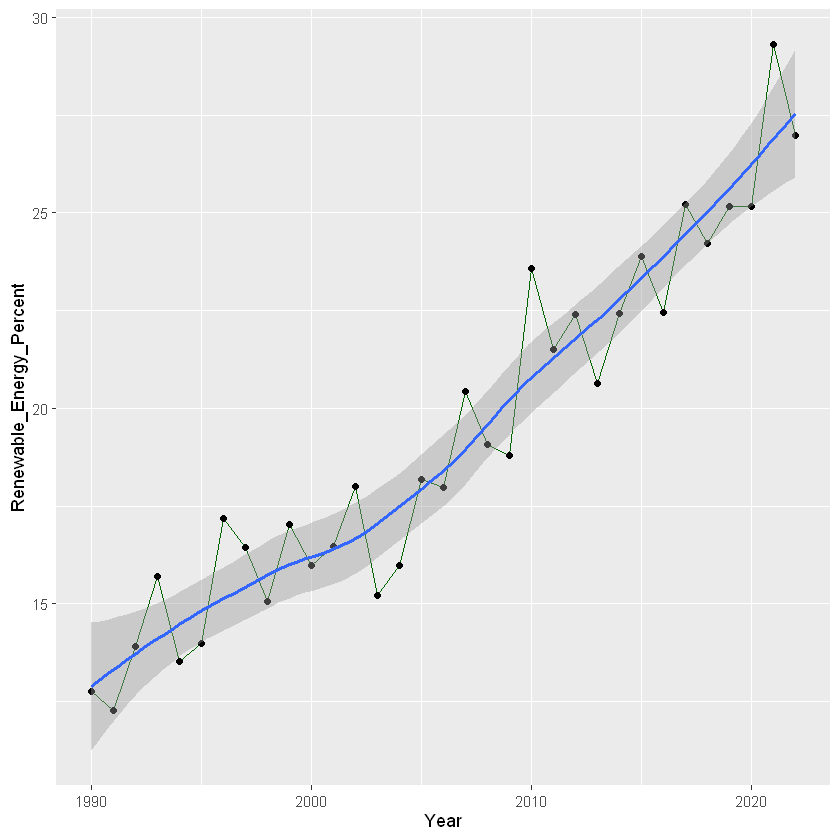

In [10]:
library(ggplot2)


ggplot(data, aes(x = Year, y = Renewable_Energy_Percent)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  geom_smooth()
  labs(title = "Renewable Energy (% of Total)", y = "Percent", x = "Year") +
  theme_minimal()

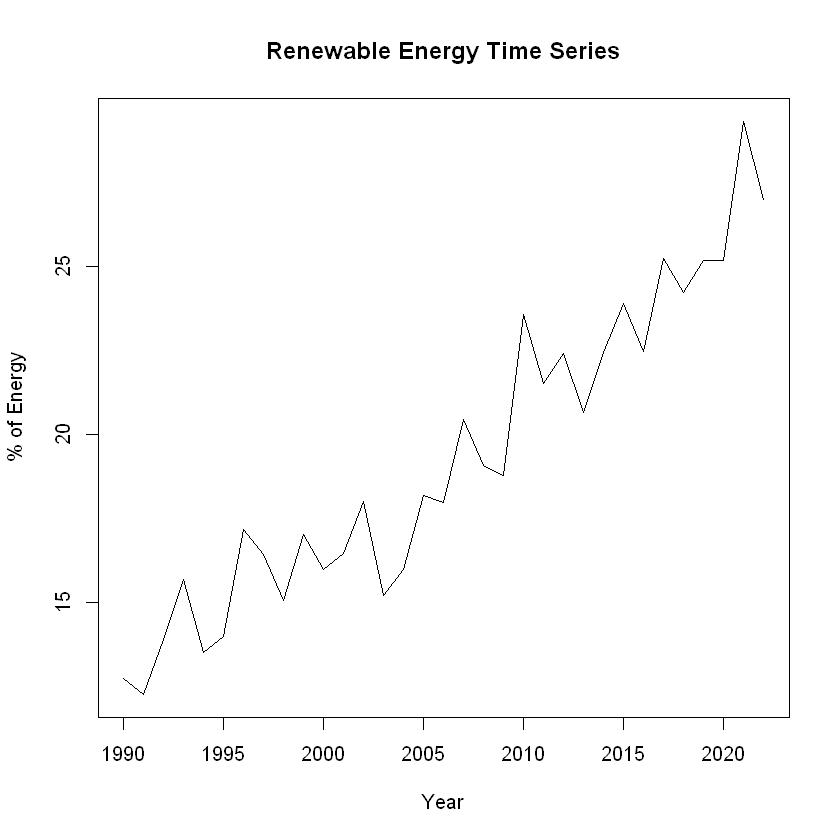

In [11]:
ts_data <- ts(data$Renewable_Energy_Percent, start = 1990, frequency = 1)
plot(ts_data, main = "Renewable Energy Time Series", ylab = "% of Energy", xlab = "Year")

In [12]:
library(tseries)

adf.test(ts_data)  # Augmented Dickey-Fuller Test

ERROR: Error in library(tseries): there is no package called 'tseries'


In [13]:
install.packages("tseries")

install.packages("forecast")

library(tseries)

adf.test(ts_data)  # Augmented Dickey-Fuller Test


Installing package into 'C:/Users/ricop/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'xts', 'TTR', 'curl', 'quadprog', 'zoo', 'quantmod'




package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ricop\AppData\Local\Temp\RtmpkBkjAE\downloaded_packages


Installing package into 'C:/Users/ricop/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'colorspace', 'fracdiff', 'generics', 'lmtest', 'Rcpp', 'timeDate', 'urca', 'RcppArmadillo'




package 'colorspace' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ricop\AppData\Local\Temp\RtmpkBkjAE\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -1.4986, Lag order = 3, p-value = 0.7668
alternative hypothesis: stationary


In [14]:
ts_diff <- diff(ts_data)
adf.test(ts_diff)

Warning message in adf.test(ts_diff):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ts_diff
Dickey-Fuller = -4.445, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


In [15]:
library(forecast)

model <- auto.arima(ts_data)
summary(model)

Series: ts_data 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.8272  0.4483
s.e.   0.1485  0.0524

sigma^2 = 2.142:  log likelihood = -57.14
AIC=120.28   AICc=121.14   BIC=124.68

Training set error measures:
                      ME     RMSE      MAE        MPE    MAPE     MASE
Training set -0.02003848 1.395607 1.056973 -0.8469776 5.71951 0.646343
                   ACF1
Training set -0.0750061

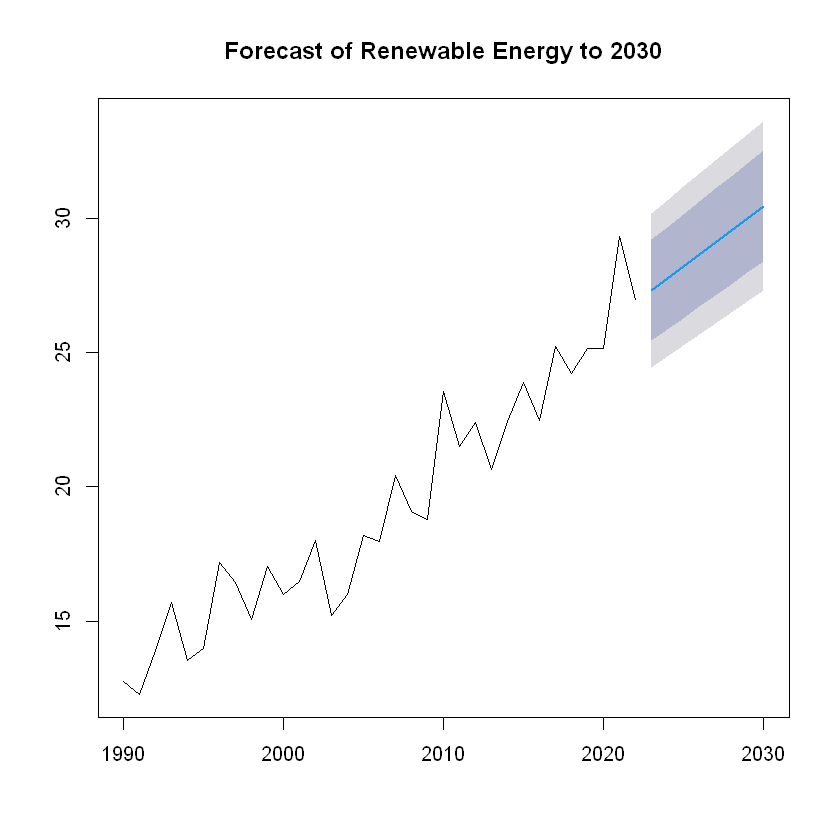

In [16]:
forecasted <- forecast(model, h = 15)  # 2023 to 2030
plot(forecasted, main = "Forecast of Renewable Energy to 2030")

Series: log(ts_data) 
ARIMA(2,1,0) with drift 

Coefficients:
          ar1      ar2   drift
      -0.6834  -0.5564  0.0246
s.e.   0.1451   0.1451  0.0059

sigma^2 = 0.005898:  log likelihood = 37.82
AIC=-67.65   AICc=-66.16   BIC=-61.78

Training set error measures:
                        ME       RMSE        MAE         MPE     MAPE      MASE
Training set -2.121013e-05 0.07199155 0.05741107 -0.04556381 1.968135 0.6656639
                   ACF1
Training set -0.1128672


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0) with drift
Q* = 11.106, df = 5, p-value = 0.04932

Model df: 2.   Total lags used: 7



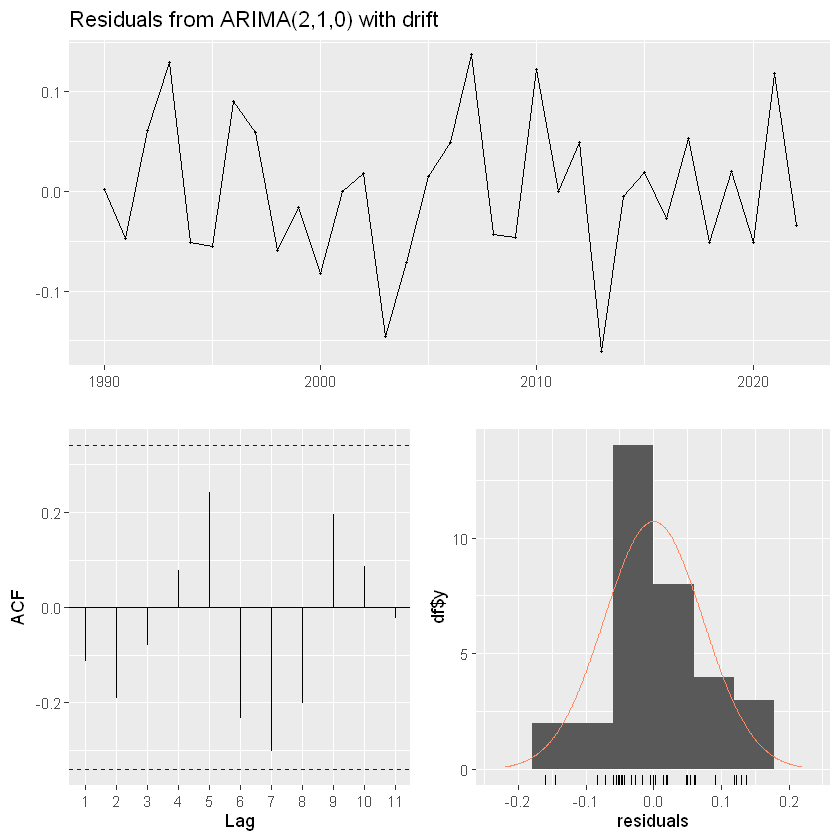

In [17]:
model <- auto.arima(log(ts_data))
summary(model)

checkresiduals(model)